In [2]:
from sklearn import datasets
import numpy as np

In [3]:
iris = datasets.load_iris()

In [4]:
type(iris)

sklearn.datasets.base.Bunch

In [8]:
%who

datasets	 iris	 np	 


In [3]:
X = iris.data[:,[2,3]]

In [4]:
type(X)

numpy.ndarray

In [5]:
y = iris.target

In [6]:
type(y)

numpy.ndarray

In [7]:
print("Class labels:", np.unique(y))

Class labels: [0 1 2]


In [8]:
type(np.unique(y))

numpy.ndarray

In [9]:
from sklearn.cross_validation import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split( X, y,  test_size = 0.3, random_state=0)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc = StandardScaler()

In [13]:
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [14]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [15]:
X_train

array([[ 3.5,  1. ],
       [ 5.5,  1.8],
       [ 5.7,  2.5],
       [ 5. ,  1.5],
       [ 5.8,  1.8],
       [ 3.9,  1.1],
       [ 6.1,  2.3],
       [ 4.7,  1.6],
       [ 3.8,  1.1],
       [ 4.9,  1.8],
       [ 5.1,  1.5],
       [ 4.5,  1.7],
       [ 5. ,  1.9],
       [ 4.7,  1.4],
       [ 5.2,  2. ],
       [ 4.5,  1.6],
       [ 1.6,  0.2],
       [ 5.1,  1.9],
       [ 4.2,  1.3],
       [ 3.6,  1.3],
       [ 4. ,  1.3],
       [ 4.6,  1.4],
       [ 6. ,  1.8],
       [ 1.5,  0.2],
       [ 1.1,  0.1],
       [ 5.3,  1.9],
       [ 4.2,  1.2],
       [ 1.7,  0.2],
       [ 1.5,  0.4],
       [ 4.9,  1.5],
       [ 1.5,  0.2],
       [ 5.1,  1.8],
       [ 3. ,  1.1],
       [ 1.4,  0.3],
       [ 4.5,  1.5],
       [ 6.1,  2.5],
       [ 4.2,  1.3],
       [ 1.4,  0.1],
       [ 5.9,  2.1],
       [ 5.7,  2.3],
       [ 5.8,  2.2],
       [ 5.6,  2.1],
       [ 1.6,  0.2],
       [ 1.6,  0.2],
       [ 5.1,  2. ],
       [ 5.7,  2.1],
       [ 1.3,  0.3],
       [ 5.4,

In [16]:
X_train_std

array([[-0.18295039, -0.29145882],
       [ 0.93066067,  0.73721938],
       [ 1.04202177,  1.6373128 ],
       [ 0.6522579 ,  0.35146505],
       [ 1.09770233,  0.73721938],
       [ 0.03977182, -0.16287405],
       [ 1.26474398,  1.38014325],
       [ 0.48521625,  0.48004983],
       [-0.01590873, -0.16287405],
       [ 0.59657735,  0.73721938],
       [ 0.70793846,  0.35146505],
       [ 0.37385514,  0.6086346 ],
       [ 0.6522579 ,  0.86580415],
       [ 0.48521625,  0.22288028],
       [ 0.76361901,  0.99438893],
       [ 0.37385514,  0.48004983],
       [-1.24088089, -1.32013702],
       [ 0.70793846,  0.86580415],
       [ 0.20681348,  0.0942955 ],
       [-0.12726983,  0.0942955 ],
       [ 0.09545238,  0.0942955 ],
       [ 0.42953569,  0.22288028],
       [ 1.20906343,  0.73721938],
       [-1.29656144, -1.32013702],
       [-1.51928365, -1.4487218 ],
       [ 0.81929956,  0.86580415],
       [ 0.20681348, -0.03428927],
       [-1.18520034, -1.32013702],
       [-1.29656144,

In [17]:
from sklearn.linear_model import Perceptron

In [32]:
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0, shuffle=True)

In [33]:
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [34]:
y_pred = ppn.predict(X_test_std)

In [35]:
print('Misclassified samples: %d'%(y_test != y_pred).sum())

Misclassified samples: 4


In [36]:
from sklearn.metrics import accuracy_score

In [37]:
print('Accuracy: %.2f' %accuracy_score(y_test,y_pred))

Accuracy: 0.91


In [19]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:,0].min() -1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() -1, X[:,1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2,Z,alpha=0.1, cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y ==cl, 0],y=X[y==cl, 1],alpha = 0.8, c=cmap(idx),marker =markers[idx],label=cl)
    if test_idx:
        X_test, y_test = X[test_idx,:], y[test_idx]
        plt.scatter(X_test[:,0],X_test[:,1],c='',alpha=1.0, linewidths=1, marker='o',s=55,label='test set')

In [20]:
X_combined_std =np.vstack((X_train_std, X_test_std))
y_combined =np.hstack((y_train,y_test))

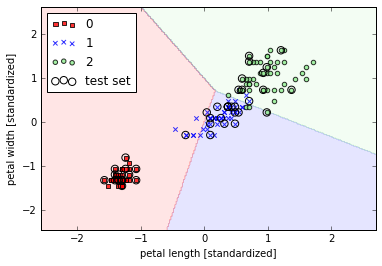

In [96]:
%matplotlib inline
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc ='upper left')
plt.show()

In [70]:
xx1,xx2 =np.meshgrid(np.arange(0,10,0.2),np.arange(10,20,0.2))

In [73]:
xx1.ravel()

array([ 0. ,  0.2,  0.4, ...,  9.4,  9.6,  9.8])

In [74]:
xx2.ravel()

array([ 10. ,  10. ,  10. , ...,  19.8,  19.8,  19.8])

In [75]:
np.arange(0,10,0.2)

array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,
        2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,
        4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,
        6.6,  6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,
        8.8,  9. ,  9.2,  9.4,  9.6,  9.8])

In [76]:
xx2

array([[ 10. ,  10. ,  10. , ...,  10. ,  10. ,  10. ],
       [ 10.2,  10.2,  10.2, ...,  10.2,  10.2,  10.2],
       [ 10.4,  10.4,  10.4, ...,  10.4,  10.4,  10.4],
       ..., 
       [ 19.4,  19.4,  19.4, ...,  19.4,  19.4,  19.4],
       [ 19.6,  19.6,  19.6, ...,  19.6,  19.6,  19.6],
       [ 19.8,  19.8,  19.8, ...,  19.8,  19.8,  19.8]])

In [77]:
xx1

array([[ 0. ,  0.2,  0.4, ...,  9.4,  9.6,  9.8],
       [ 0. ,  0.2,  0.4, ...,  9.4,  9.6,  9.8],
       [ 0. ,  0.2,  0.4, ...,  9.4,  9.6,  9.8],
       ..., 
       [ 0. ,  0.2,  0.4, ...,  9.4,  9.6,  9.8],
       [ 0. ,  0.2,  0.4, ...,  9.4,  9.6,  9.8],
       [ 0. ,  0.2,  0.4, ...,  9.4,  9.6,  9.8]])

In [94]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression(C=1000.0, random_state = 0)
lr.fit(X_train_std,y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

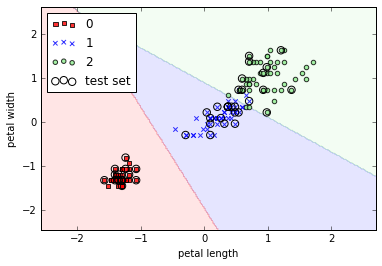

In [98]:
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx =range(105,150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

In [100]:
lr.predict_proba(X_test_std[0,:].reshape(1,-1))

array([[  2.05743774e-11,   6.31620264e-02,   9.36837974e-01]])

In [102]:
X_test_std[0,:]

array([ 0.70793846,  1.50872803])

In [103]:
X_test_std[0,:].reshape(1,-1)

array([[ 0.70793846,  1.50872803]])

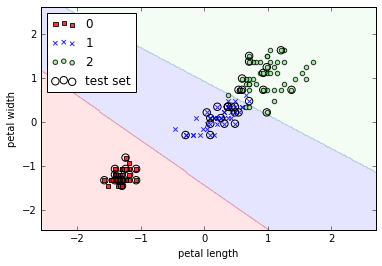

In [106]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=svm,test_idx=range(105,150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

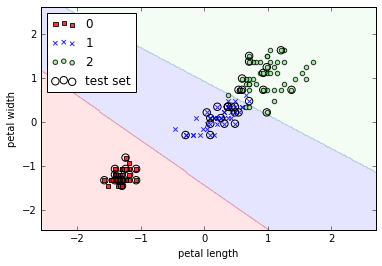

In [25]:
%matplotlib inline
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=svm,test_idx=range(105,150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

In [18]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression(C=1000.0,random_state=0)
lr.fit(X_train_std,y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [22]:
plot_decision_regions(X_combined_std,y_combined,classifier=lr,test_idx=range(105,150))

In [23]:
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

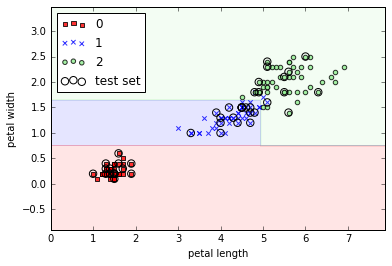

In [28]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
tree.fit(X_train,y_train)
X_combined = np.vstack((X_train,X_test))
y_combined = np.hstack((y_train,y_test))
plot_decision_regions(X_combined,y_combined,classifier=tree,test_idx=range(105,150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

In [29]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file='tree.dot',feature_names=['petal length','petal width'])

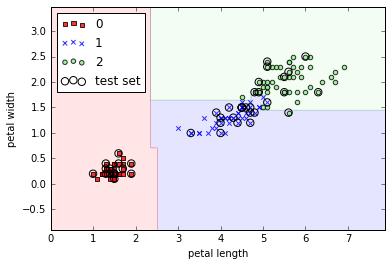

In [32]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy',n_estimators=10,random_state=1,n_jobs=)
forest.fit(X_train,y_train)
plot_decision_regions(X_combined,y_combined,classifier=forest,test_idx=range(105,150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()